In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas_profiling as pp
from pandas_profiling import ProfileReport
#from pycaret.classification import *

**Function to read data from CSV file**

In [5]:
def import_csv_data(filepath):
    
    df = pd.read_csv(filepath, 
                          index_col=[0], 
                          parse_dates=['EFFECTIVEDATE','PAIDTODATE','INCEPTIONDATE'], 
                          infer_datetime_format=True)
    
    return df

In [6]:
data = import_csv_data('../data/persistency/training_and_test_data.csv')

data.head()

PRODUCT               OCCUPATION GENDER  \
POLICYNO                                                                 
8868646                   BIMA YA KARO        TEACHER [CLASS 1]      M   
MMP/11887/2018  MADISON MONEY MAX PLUS  ADMINISTRATOR [CLASS 1]      F   
LK3284934            MADISON 2000 PLUS     IT MANAGER [CLASS 1]      M   
MUP/00316/2017         MADISON UNIPLAN        TEACHER [CLASS 1]      F   
HP/23948/2017            HEKIMA POLICY        TEACHER [CLASS 1]      F   

               EFFECTIVEDATE  UNDERWRITINGYEAR  TERM  ANB FREQOFPAYMENT  \
POLICYNO                                                                  
8868646           2015-01-09              2015    15   43             M   
MMP/11887/2018    2018-01-07              2018     8   54             M   
LK3284934         2013-01-02              2013    12   43             M   
MUP/00316/2017    2017-01-08              2017     6   58             M   
HP/23948/2017     2017-01-04              2017    12   44             M   

               PAYMETHOD  SUMASSURED PAIDTODATE  PREMIUM  OSPREM PRODTYPE  \
POLICYNO                                                                    
8868646                K    214592.0 2020-04-30   3000.0  -831.0       ED   
MMP/11887/2018        DD    100265.0 2020-06-30   3000.0 -8000.0       IN   
LK3284934              K    305922.0 2020-04-30   5187.0  -548.0       EN   
MUP/00316/2017         K    385638.0 2020-05-31   5000.0 -5000.0       IN   
HP/23948/2017          K    147015.0 2020-05-31   2000.0 -2821.0       EN   

               INCEPTIONDATE  STATUS  
POLICYNO                              
8868646           2015-01-09  ACTIVE  
MMP/11887/2018    2018-04-05  ACTIVE  
LK3284934         2012-11-23  ACTIVE  
MUP/00316/2017    2017-01-08  ACTIVE  
HP/23948/2017     2017-01-13  ACTIVE

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64999 entries, 8868646 to MMP/10683/2018
Data columns (total 16 columns):
PRODUCT             64999 non-null object
OCCUPATION          64999 non-null object
GENDER              64999 non-null object
EFFECTIVEDATE       64999 non-null datetime64[ns]
UNDERWRITINGYEAR    64999 non-null int64
TERM                64999 non-null int64
ANB                 64999 non-null int64
FREQOFPAYMENT       64999 non-null object
PAYMETHOD           64952 non-null object
SUMASSURED          64999 non-null float64
PAIDTODATE          64935 non-null datetime64[ns]
PREMIUM             64999 non-null float64
OSPREM              64999 non-null float64
PRODTYPE            64999 non-null object
INCEPTIONDATE       64999 non-null datetime64[ns]
STATUS              64999 non-null object
dtypes: datetime64[ns](3), float64(3), int64(3), object(7)
memory usage: 8.4+ MB


In [8]:
data.dtypes

PRODUCT                     object
OCCUPATION                  object
GENDER                      object
EFFECTIVEDATE       datetime64[ns]
UNDERWRITINGYEAR             int64
TERM                         int64
ANB                          int64
FREQOFPAYMENT               object
PAYMETHOD                   object
SUMASSURED                 float64
PAIDTODATE          datetime64[ns]
PREMIUM                    float64
OSPREM                     float64
PRODTYPE                    object
INCEPTIONDATE       datetime64[ns]
STATUS                      object
dtype: object

**Horizontal chart to show policy status distribution**

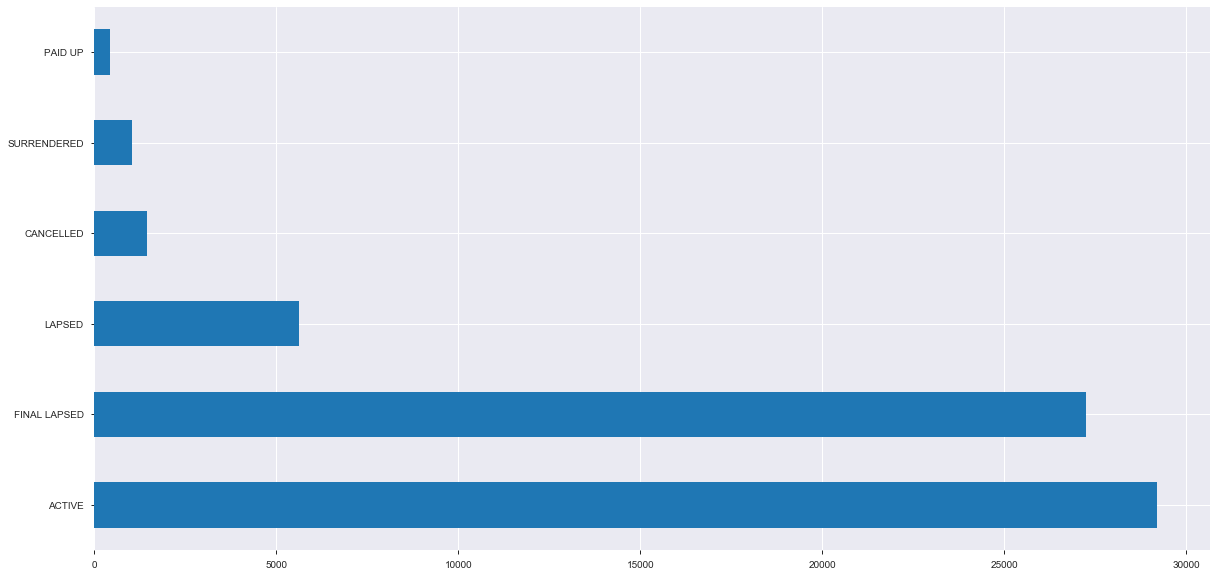

In [9]:
policy = data['STATUS'].value_counts().head(30).plot(kind='barh', figsize=(20,10))

In [10]:
data['STATUS'].value_counts()

ACTIVE          29197
FINAL LAPSED    27250
LAPSED           5619
CANCELLED        1459
SURRENDERED      1028
PAID UP           446
Name: STATUS, dtype: int64

**Function to Clean up Statuses**

In [11]:

def status_cleanup(policies):  
    frequency = policies['FREQOFPAYMENT']
    premium = policies['PREMIUM'] 
    outstandingBal = policies['OSPREM']
    polStatus = policies['STATUS']
    productType = policies['PRODTYPE']
        
    if polStatus == 'SURRENDERED':
        return polStatus
    elif polStatus == 'CANCELLED':
        return polStatus
    elif polStatus == 'PAID UP':
        return polStatus
    elif polStatus == 'FINAL LAPSED':
        return polStatus
    elif polStatus == 'LAPSED':
        return polStatus
    elif polStatus == 'ACTIVE':
        noOfOutstandingInstalment = outstandingBal/premium
        if frequency == 'M':
            if noOfOutstandingInstalment > 3 and noOfOutstandingInstalment <= 12:
                return 'LAPSED'
            elif noOfOutstandingInstalment > 12:
                if productType == 'IN':
                    return 'LAPSED'
                else:
                    return 'FINAL LAPSED'
            else:
                return polStatus
        elif frequency == 'Q':
            if noOfOutstandingInstalment > 2 and noOfOutstandingInstalment <= 4:
                return 'LAPSED'
            elif noOfOutstandingInstalment > 4:
                if productType == 'IN':
                    return 'LAPSED'
                else:
                    return 'FINAL LAPSED'
            else:
                return polStatus
        elif frequency == 'F':
            if noOfOutstandingInstalment > 1:
                if productType == 'IN':
                    return 'LAPSED'
                else:
                    return 'FINAL LAPSED'
            else:
                return polStatus
        elif frequency == 'S':
            if noOfOutstandingInstalment > 1 and noOfOutstandingInstalment <= 2:
                return 'LAPSED'
            elif noOfOutstandingInstalment > 2:
                if productType == 'IN':
                    return 'LAPSED'
                else:
                    return 'FINAL LAPSED'
            else:
                return polStatus
        elif frequency == 'A':
            if noOfOutstandingInstalment > 1 and noOfOutstandingInstalment <= 2:
                return 'LAPSED'
            elif noOfOutstandingInstalment > 2:
                if productType == 'IN':
                    return 'LAPSED'
                else:
                    return 'FINAL LAPSED'
            else:
                return polStatus
        elif frequency == 'W':
            if noOfOutstandingInstalment > 3 and noOfOutstandingInstalment <= 12:
                return 'LAPSED'
            elif noOfOutstandingInstalment > 12:
                if productType == 'IN':
                    return 'LAPSED'
                else:
                    return 'FINAL LAPSED'
            else:
                return polStatus
        else:
            return polStatus
      
    else:
        return polStatus      
            

In [12]:
data['FREQOFPAYMENT'].value_counts()

M    64509
Q      300
A      115
S       63
F        8
W        4
Name: FREQOFPAYMENT, dtype: int64

In [13]:
categorical = data.select_dtypes(include='object').columns

for col in categorical:
    if col not in ['OCCUPATION']:
        print(data[col].value_counts())

BIMA YA KARO                             43554
HEKIMA POLICY                             8393
MADISON MONEY MAX                         5339
MADISON MONEY MAX PLUS                    4209
MADISON UNIPLAN                           1014
BIMA DADA                                  877
BIMA CHALI                                 816
MADISON 2000 PLUS                          678
MADISON SMART INVESTOR FINANCIAL PLAN       89
MORTGAGE PROTECTION                         11
ORDINARY ENDOWMENT                           9
MADISON SCHOOL FEES POLICY 2004              7
WHOLE LIFE POLICY                            2
LEVEL TERM ASSURANCE                         1
Name: PRODUCT, dtype: int64
M    39198
F    25801
Name: GENDER, dtype: int64
M    64509
Q      300
A      115
S       63
F        8
W        4
Name: FREQOFPAYMENT, dtype: int64
K     31471
C     14662
DD    10062
R      6300
Q       870
S       811
Z       766
M        10
Name: PAYMETHOD, dtype: int64
ED    43566
IN    12344
EN     9075
TM 

In [14]:
data['STATUS'] = data.apply(lambda x: status_cleanup(x), axis=1)

**Categorical features** visualization, this will help us see the data distribution by the each feature.

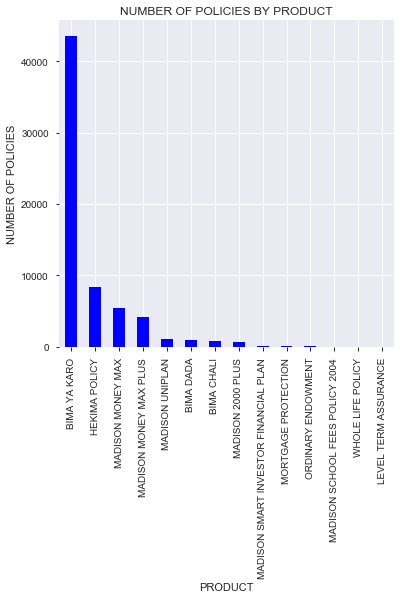

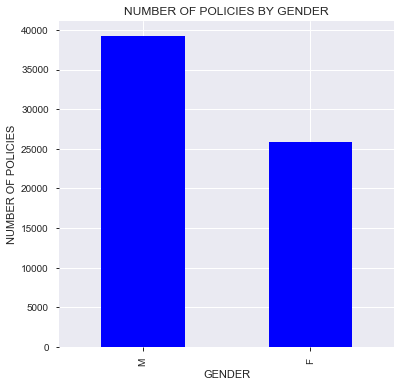

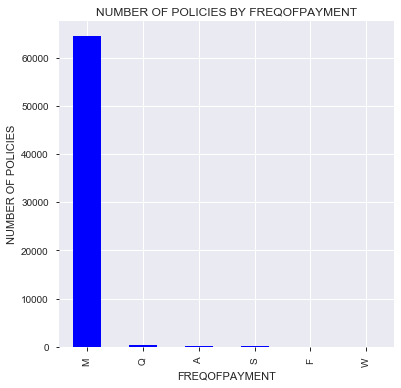

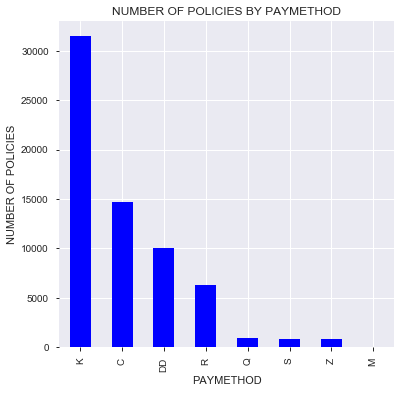

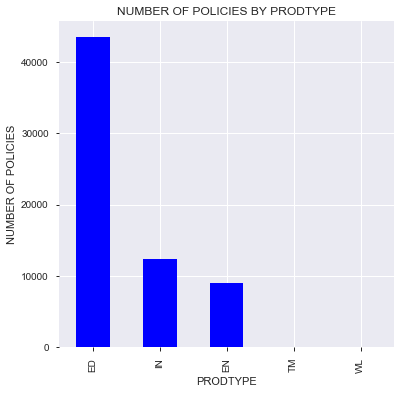

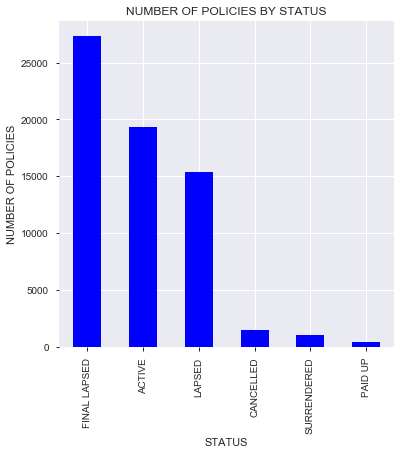

In [12]:
#policy = data['STATUS'].value_counts().head(30).plot(kind='barh', figsize=(20,10))
def plot_bars(policies, cols):
    for col in cols:
        if col not in ['OCCUPATION']:
            fig = plt.figure(figsize=(6,6)) # define plot area
            ax = fig.gca() # define axis    
            counts = policies[col].value_counts() # find the counts for each unique category
            counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
            ax.set_title('NUMBER OF POLICIES BY ' + col) # Give the plot a main title
            ax.set_xlabel(col) # Set text for the x axis
            ax.set_ylabel('NUMBER OF POLICIES')# Set text for y axis
            plt.show()

plot_cols = categorical
plot_bars(data, plot_cols)    

**Numerical features** visualization, this will help us see the data distribution by the each feature.

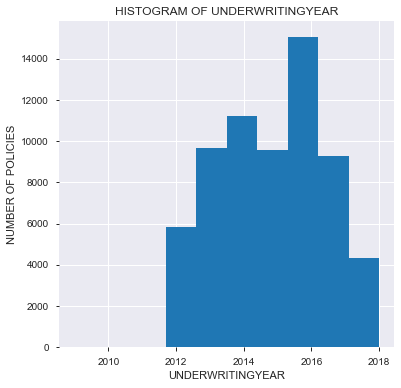

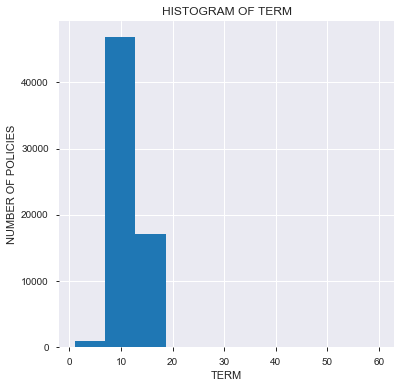

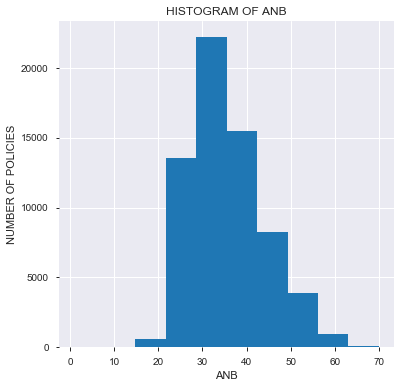

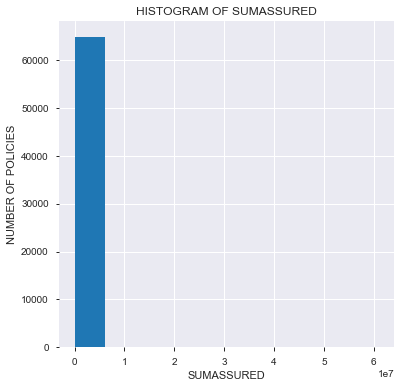

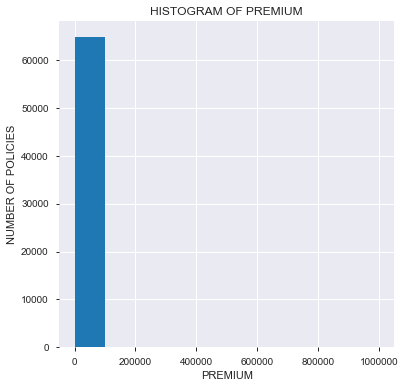

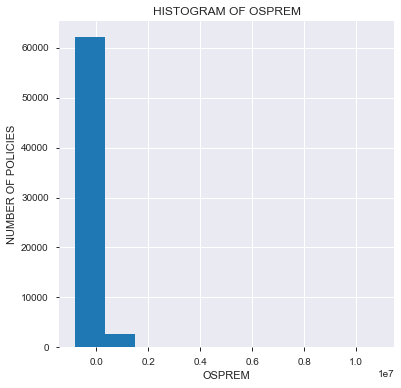

In [13]:
numerical = data.select_dtypes(include='number').columns.to_list()
def plot_histogram(policies, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        policies[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('HISTOGRAM OF ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('NUMBER OF POLICIES')# Set text for y axis
        plt.show()
        
num_cols = numerical    
plot_histogram(data, num_cols)

**Kernel density estimation(kde) plots on numerical features**

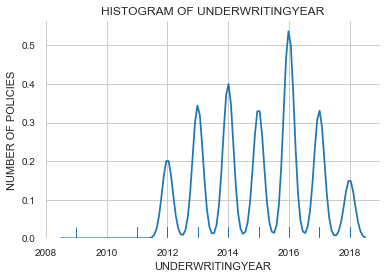

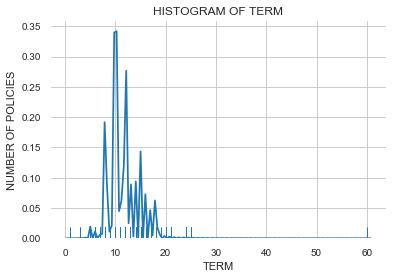

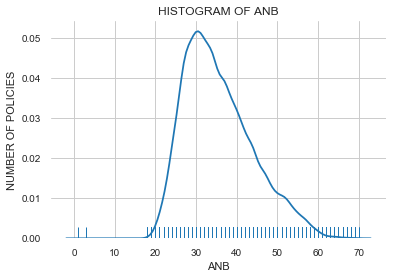

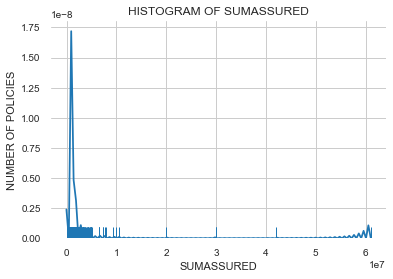

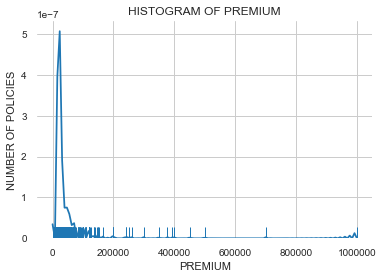

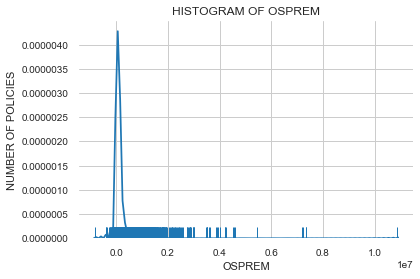

In [14]:

def plot_density_hist(policies, cols, bins = 10, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(policies[col], bins = bins, rug=True, hist = hist)
        plt.title('HISTOGRAM OF ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('NUMBER OF POLICIES')# Set text for y axis
        plt.show()
        
plot_density_hist(data, numerical)  

**Combine kde and histogaram**

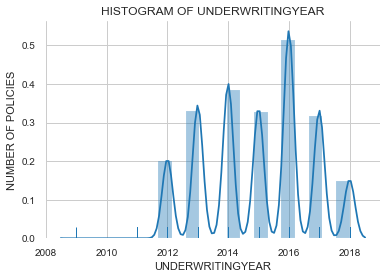

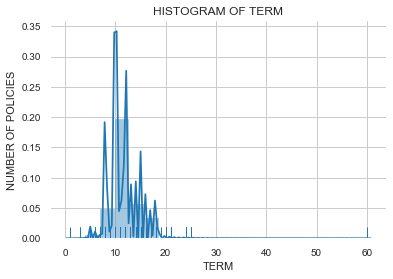

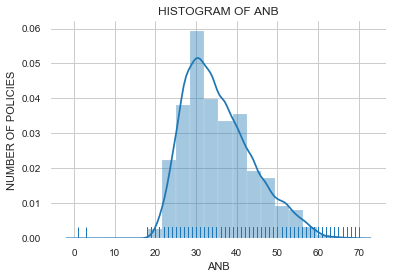

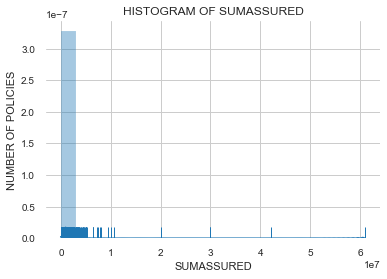

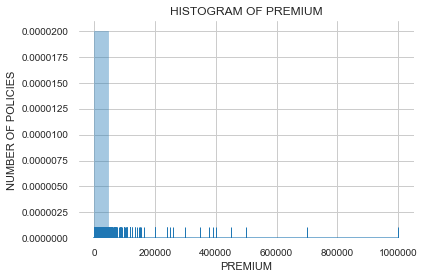

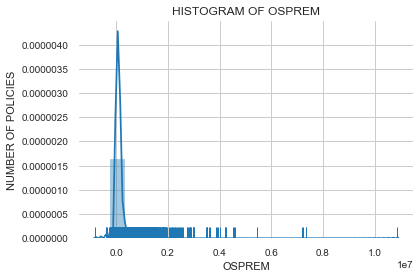

In [15]:
plot_density_hist(data, numerical, bins = 20, hist = True)    

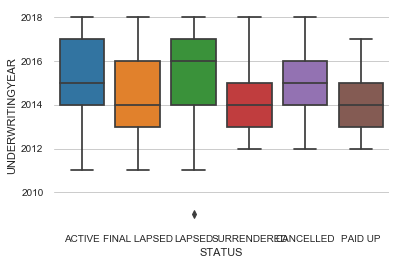

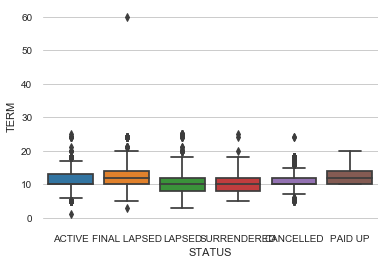

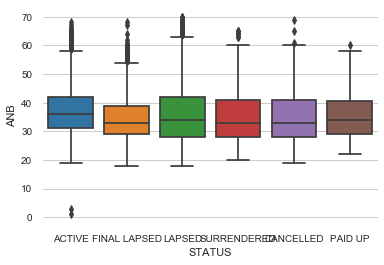

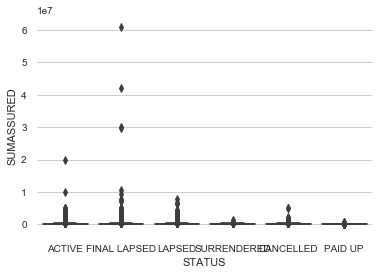

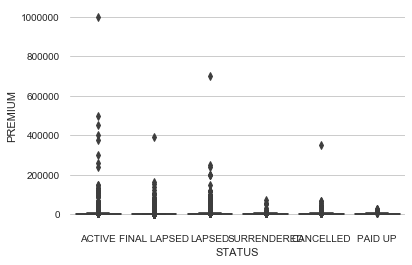

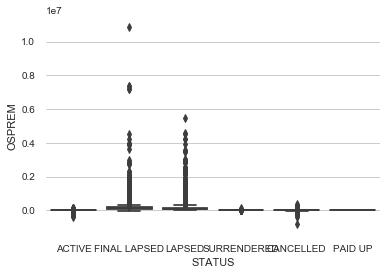

In [16]:
def plot_box(policies, cols, col_x = 'STATUS'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=policies)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = numerical
plot_box(data, num_cols)

PRODUCT


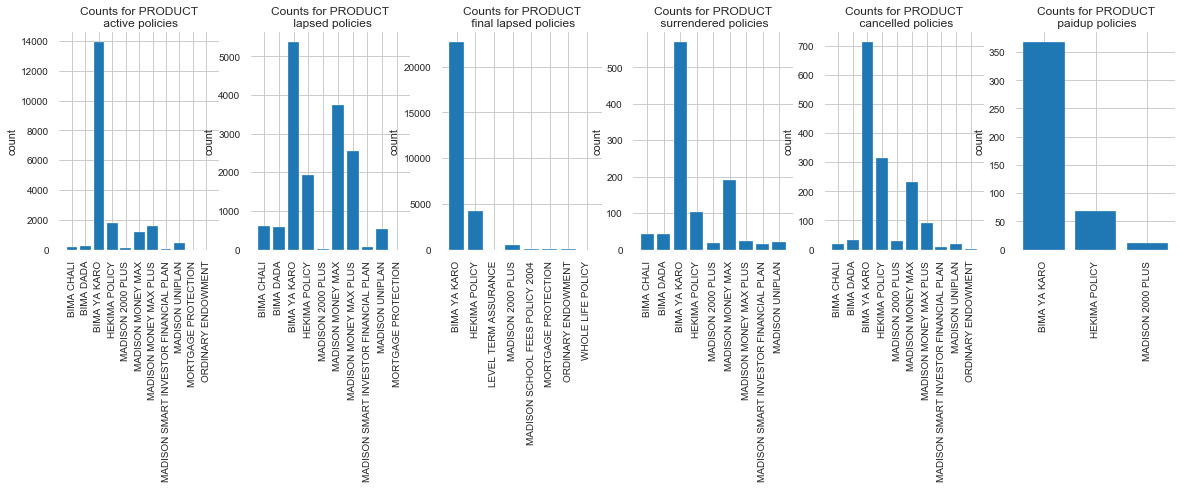

GENDER


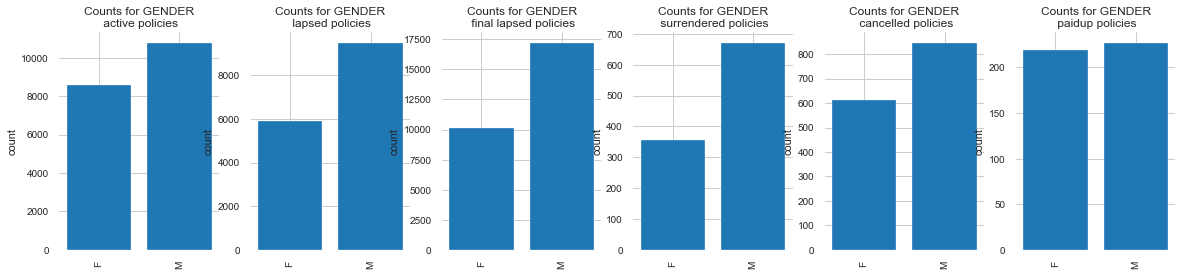

FREQOFPAYMENT


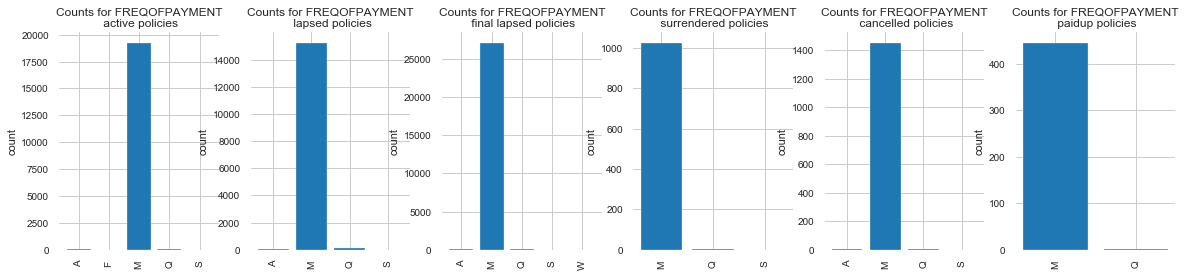

PAYMETHOD


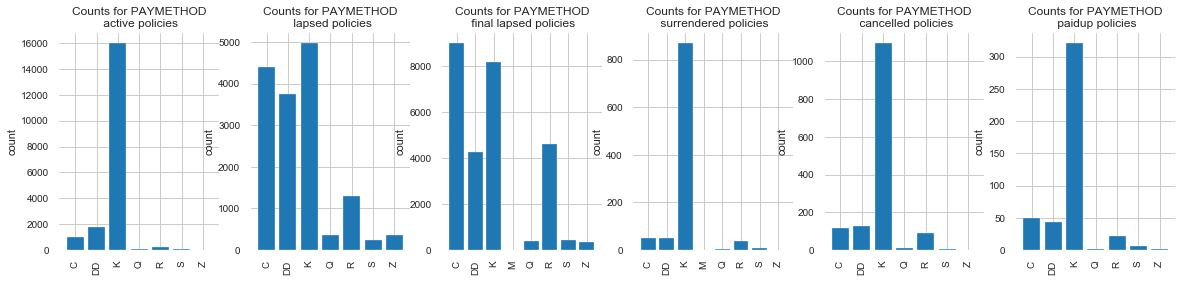

PRODTYPE


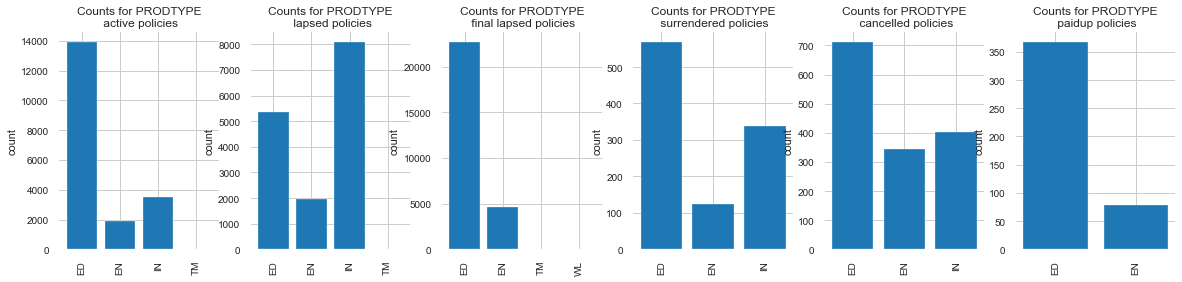

In [17]:
import numpy as np
cat_cols = categorical

data['dummy'] = np.ones(shape = data.shape[0])
for col in cat_cols:
    if col not in ['OCCUPATION','STATUS']: 
        print(col)
        counts = data[['dummy', 'STATUS', col]].groupby(['STATUS', col], as_index = False).count()
        temp = counts[counts['STATUS'] == 'ACTIVE'][[col, 'dummy']]
        _ = plt.figure(figsize = (20,4))
        plt.subplot(1, 6, 1)
        temp = counts[counts['STATUS'] == 'ACTIVE'][[col, 'dummy']]
        plt.bar(temp[col], temp.dummy)
        plt.xticks(rotation=90)
        plt.title('Counts for ' + col + '\n active policies')
        plt.ylabel('count')
        plt.subplot(1, 6, 2)
        temp = counts[counts['STATUS'] == 'LAPSED'][[col, 'dummy']]
        plt.bar(temp[col], temp.dummy)
        plt.xticks(rotation=90)
        plt.title('Counts for ' + col + '\n lapsed policies')
        plt.ylabel('count')
        plt.subplot(1, 6, 3)
        temp = counts[counts['STATUS'] == 'FINAL LAPSED'][[col, 'dummy']]
        plt.bar(temp[col], temp.dummy)
        plt.xticks(rotation=90)
        plt.title('Counts for ' + col + '\n final lapsed policies')
        plt.ylabel('count')
        plt.subplot(1, 6, 4)
        temp = counts[counts['STATUS'] == 'SURRENDERED'][[col, 'dummy']]
        plt.bar(temp[col], temp.dummy)
        plt.xticks(rotation=90)
        plt.title('Counts for ' + col + '\n surrendered policies')
        plt.ylabel('count')
        plt.subplot(1, 6, 5)
        temp = counts[counts['STATUS'] == 'CANCELLED'][[col, 'dummy']]
        plt.bar(temp[col], temp.dummy)
        plt.xticks(rotation=90)
        plt.title('Counts for ' + col + '\n cancelled policies')
        plt.ylabel('count')
        plt.subplot(1, 6, 6)
        temp = counts[counts['STATUS'] == 'PAID UP'][[col, 'dummy']]
        plt.bar(temp[col], temp.dummy)
        plt.xticks(rotation=90)
        plt.title('Counts for ' + col + '\n paidup policies')
        plt.ylabel('count')
        plt.show()

**Using 1d KDE plots along with the countour plot showing 2d density.**

In [18]:
data.drop('dummy', axis=1, inplace=True)

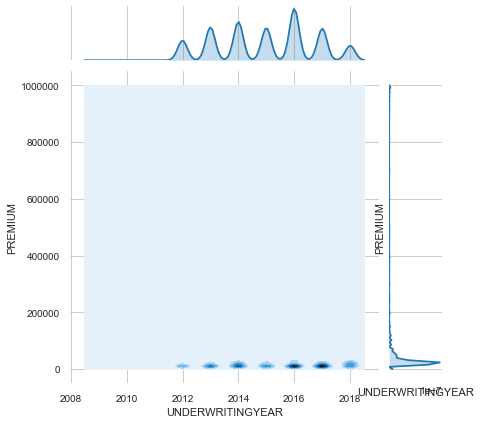

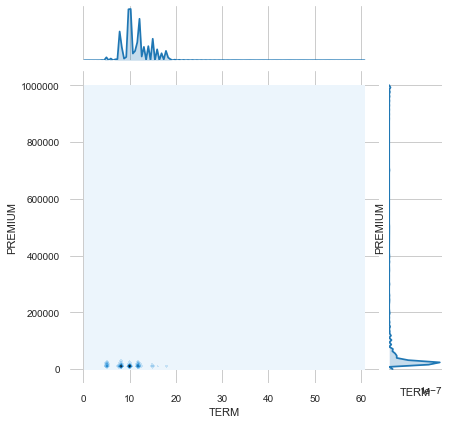

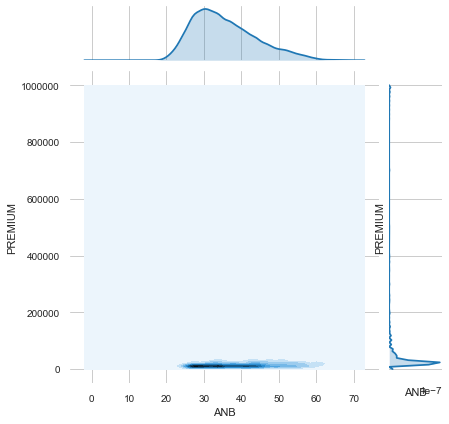

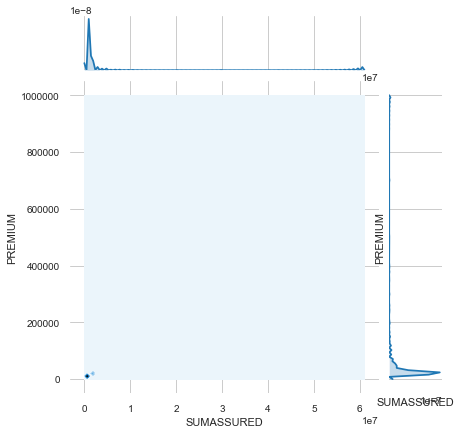

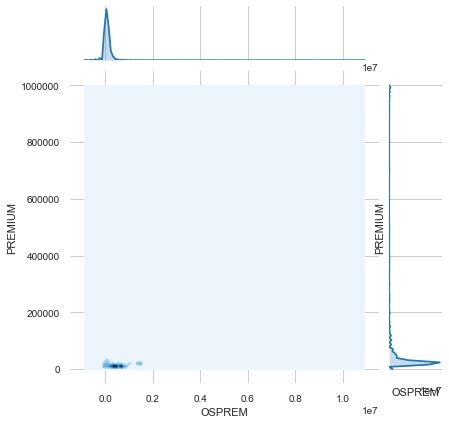

In [19]:
def plot_desity_2d(policies, cols, col_y = 'PREMIUM', kind ='kde'):
    for col in cols:
        if col not in ['PREMIUM']: 
            sns.set_style("whitegrid")
            sns.jointplot(col, col_y, data=policies, kind=kind)
            plt.xlabel(col) # Set text for the x axis
            plt.ylabel(col_y)# Set text for y axis
            plt.show()

plot_desity_2d(data, num_cols)   

**Using 2d hexbin plots and 1d histograms.**

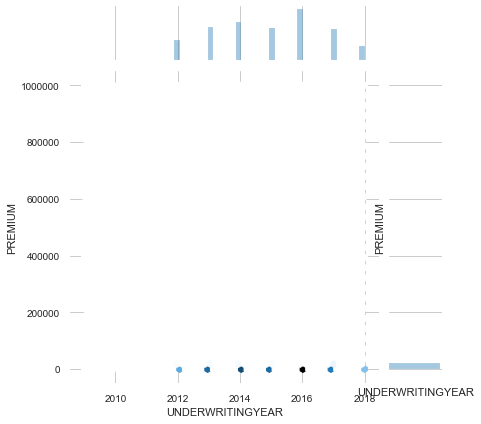

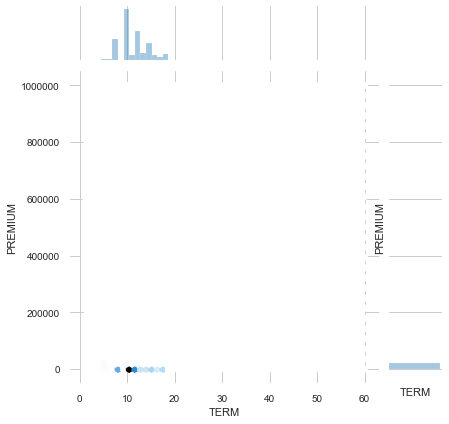

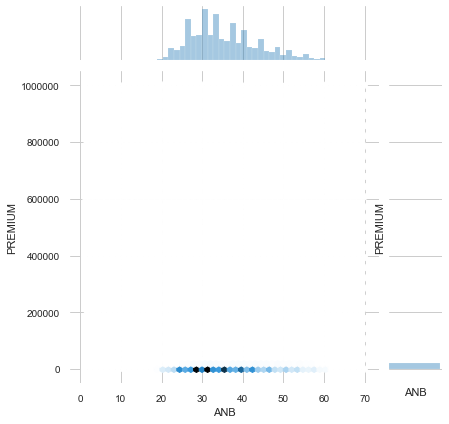

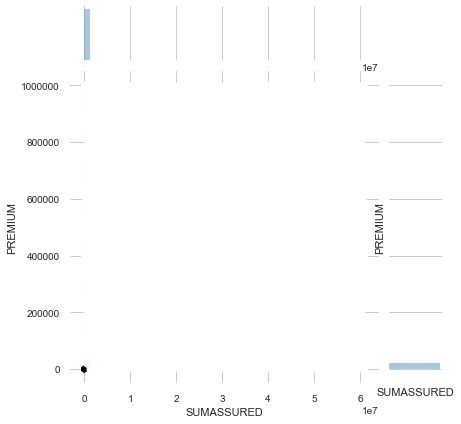

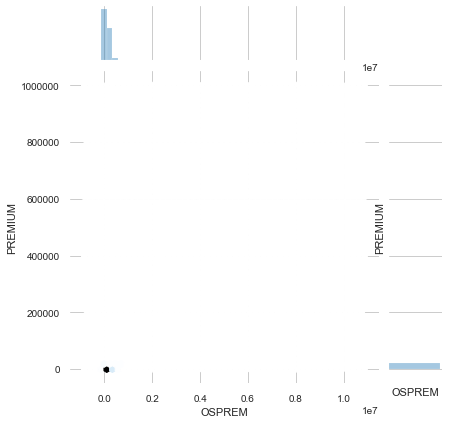

In [20]:
plot_desity_2d(data, num_cols, kind = 'hex')   

'STATUS'

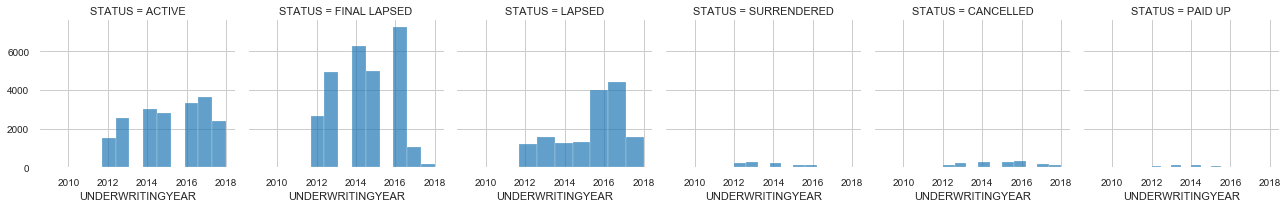

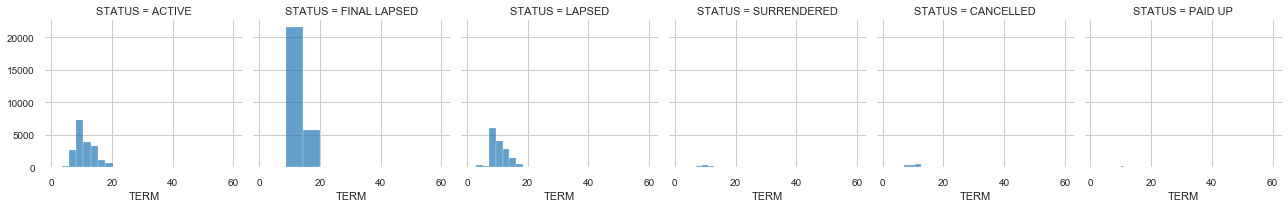

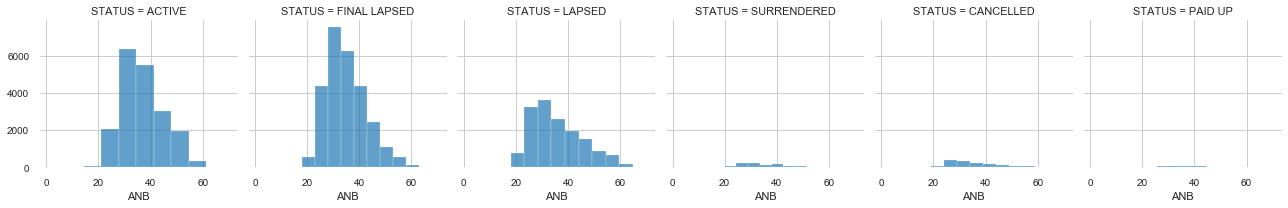

In [21]:
## Function to plot conditioned histograms
def cond_hists(df, plot_cols, grid_col):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ## Loop over the list of columns
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col=grid_col)
        grid1.map(plt.hist, col, alpha=.7)
    return grid_col

## Define columns for making a conditioned histogram
plot_cols2 = ["UNDERWRITINGYEAR",
               "TERM",
               "ANB"]

cond_hists(data, plot_cols2, 'STATUS')

In [20]:
data.PREMIUM.value_counts()

2000.0    13484
3000.0    12629
2500.0     6462
1500.0     5449
5000.0     4717
          ...  
3729.0        1
3535.0        1
3026.0        1
1579.0        1
1920.0        1
Name: PREMIUM, Length: 3294, dtype: int64

In [23]:
#Inspect policy status after cleanup
data['STATUS'].value_counts()

FINAL LAPSED    27325
ACTIVE          19350
LAPSED          15391
CANCELLED        1459
SURRENDERED      1028
PAID UP           446
Name: STATUS, dtype: int64

In [17]:
data['TERM'].value_counts()

10    22343
12    12897
8      9134
15     4551
13     3132
14     3031
18     2584
11     2417
16     2250
17     1509
5       620
6       324
9        73
24       44
7        34
20       28
25       12
21       11
3         2
60        1
19        1
1         1
Name: TERM, dtype: int64

In [18]:
data['ANB'].value_counts()

30    3441
32    3294
31    3292
29    3254
33    3190
28    3183
34    2938
27    2921
35    2831
36    2591
37    2551
26    2432
38    2375
39    2280
40    2038
25    1922
41    1917
42    1733
43    1595
44    1508
24    1404
45    1244
46    1150
47    1027
23    1001
48     930
49     789
52     715
50     690
51     689
22     665
53     562
54     455
55     430
21     368
56     348
57     310
58     217
20     178
59     170
60     114
61      60
19      44
62      37
64      33
63      23
65      21
67       9
68       9
66       8
69       5
18       4
70       2
3        1
1        1
Name: ANB, dtype: int64

In [19]:
data['PRODTYPE'].value_counts()

ED    43566
IN    12344
EN     9075
TM       12
WL        2
Name: PRODTYPE, dtype: int64

**Line chart to show policy distribution by underwriting year**

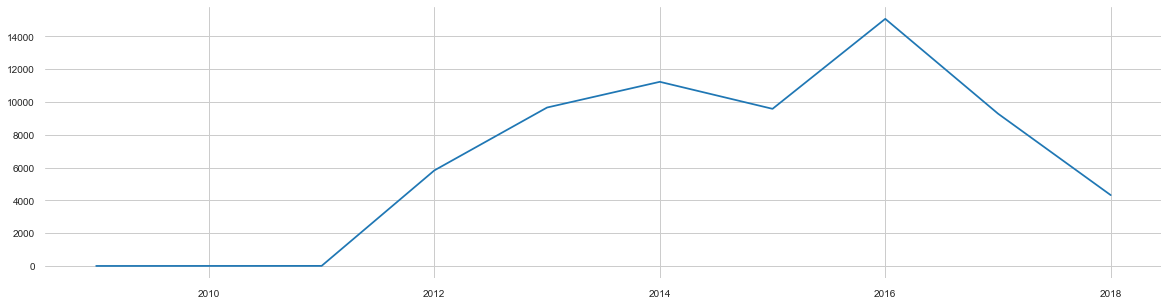

In [24]:
plt.figure(figsize=(20,5))
policy = plt.plot(data['UNDERWRITINGYEAR'].value_counts().sort_index())

In [25]:
data['UNDERWRITINGYEAR'].value_counts()

2016    15072
2014    11232
2013     9664
2015     9584
2017     9291
2012     5829
2018     4321
2011        5
2009        1
Name: UNDERWRITINGYEAR, dtype: int64

**Premium statistical analysis**

In [26]:
data.groupby('UNDERWRITINGYEAR')['PREMIUM'].describe()

count         mean           std     min     25%     50%  \
UNDERWRITINGYEAR                                                               
2009                  1.0  1555.000000           NaN  1555.0  1555.0  1555.0   
2011                  5.0  2660.000000    867.755726  1500.0  2000.0  3000.0   
2012               5829.0  3219.047212   5396.600792   172.0  1991.0  2200.0   
2013               9664.0  3331.561119   8338.808153   798.0  2000.0  2500.0   
2014              11232.0  3327.191417   5924.566182   525.0  2000.0  2500.0   
2015               9584.0  3224.509132   4234.745361    76.0  2000.0  2500.0   
2016              15072.0  3303.205746   6019.574079   634.0  2000.0  2847.5   
2017               9291.0  4225.037773  14256.766191   667.0  2000.0  3000.0   
2018               4321.0  4293.648276   9552.748751  1000.0  2000.0  3000.0   

                      75%        max  
UNDERWRITINGYEAR                      
2009              1555.00     1555.0  
2011              3300.00     3500.0  
2012              3064.00   200000.0  
2013              3100.00   700000.0  
2014              3000.00   376778.0  
2015              3101.75   166000.0  
2016              3125.00   391064.0  
2017              4000.00  1000000.0  
2018              5000.00   500000.0

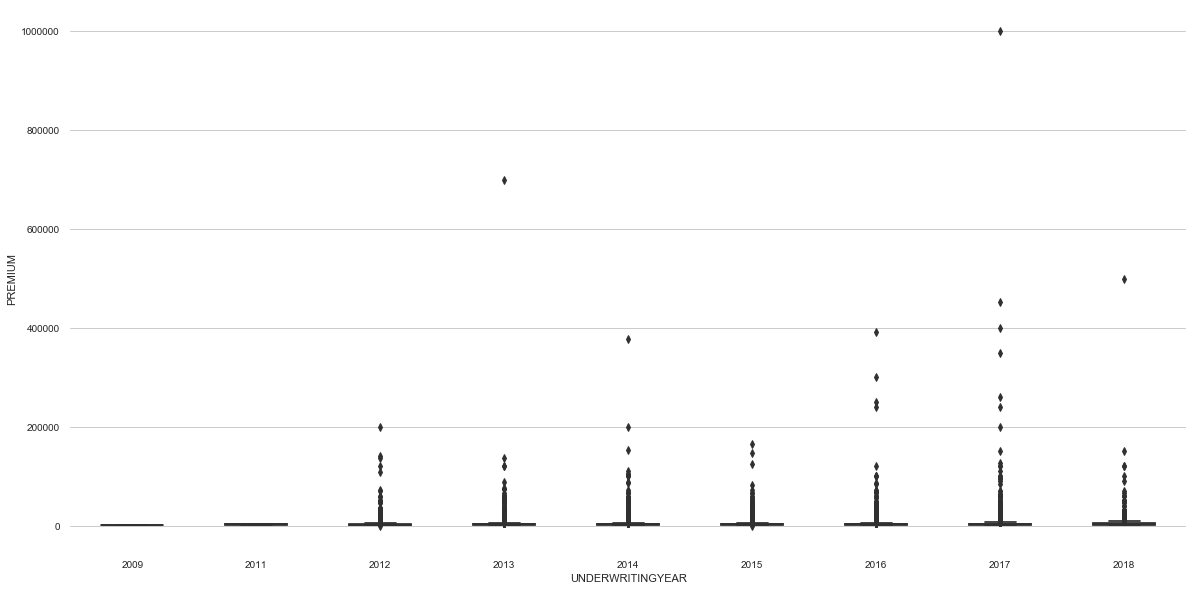

In [27]:
plt.figure(figsize=(20,10))
bplot = sns.boxplot(y='PREMIUM', x='UNDERWRITINGYEAR', 
                 data=data, 
                 width=0.5,
                 palette="colorblind")


**Term statistical analysis**

In [28]:
data.groupby('UNDERWRITINGYEAR')['TERM'].describe()

count       mean       std   min   25%   50%   75%   max
UNDERWRITINGYEAR                                                            
2009                  1.0  10.000000       NaN  10.0  10.0  10.0  10.0  10.0
2011                  5.0  11.200000  2.167948  10.0  10.0  10.0  11.0  15.0
2012               5829.0  11.452908  2.933498   5.0  10.0  10.0  13.0  25.0
2013               9664.0  11.562190  2.754703   3.0  10.0  10.0  13.0  25.0
2014              11232.0  11.659633  2.555410   5.0  10.0  11.0  13.0  25.0
2015               9584.0  11.756260  2.685556   8.0  10.0  12.0  13.0  25.0
2016              15072.0  11.727309  2.598536   8.0  10.0  12.0  13.0  60.0
2017               9291.0  10.910128  2.950178   5.0   8.0  10.0  12.0  24.0
2018               4321.0  10.481370  3.116591   1.0   8.0  10.0  12.0  24.0

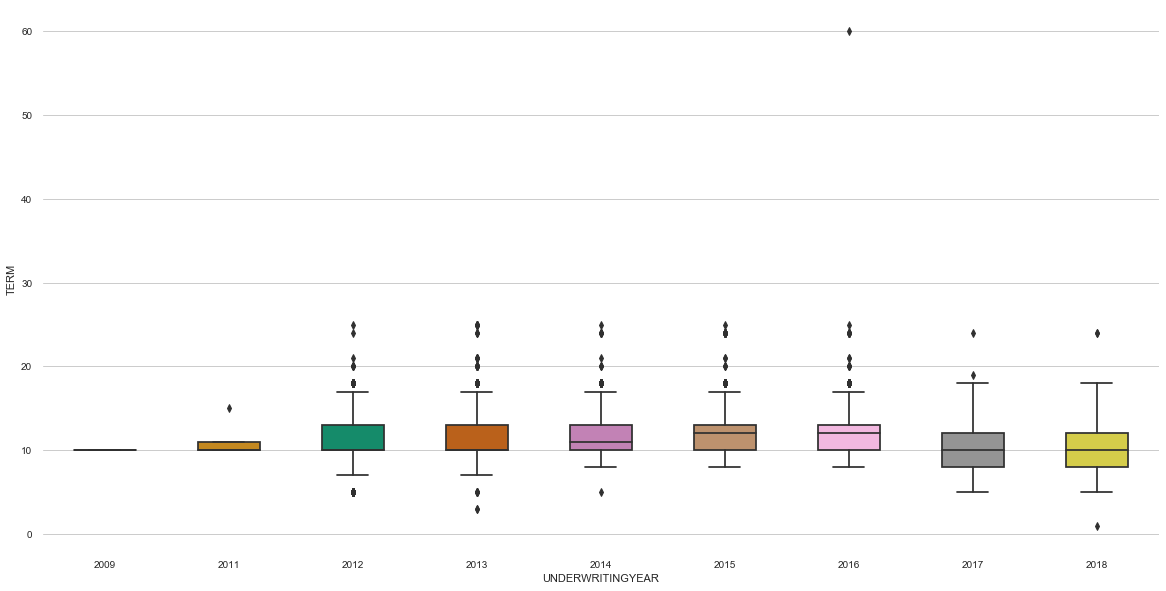

In [29]:
plt.figure(figsize=(20,10))
bplot = sns.boxplot(y='TERM', x='UNDERWRITINGYEAR', 
                 data=data, 
                 width=0.5,
                 palette="colorblind")

**Age statistical analysis**

In [30]:
data.groupby('UNDERWRITINGYEAR')['ANB'].describe()

count       mean       std   min   25%   50%   75%   max
UNDERWRITINGYEAR                                                            
2009                  1.0  38.000000       NaN  38.0  38.0  38.0  38.0  38.0
2011                  5.0  39.000000  9.513149  26.0  36.0  37.0  45.0  51.0
2012               5829.0  35.100360  8.149094  19.0  29.0  34.0  40.0  69.0
2013               9664.0  35.845923  8.482729   1.0  29.0  35.0  41.0  70.0
2014              11232.0  35.634972  8.365490   3.0  29.0  34.0  41.0  68.0
2015               9584.0  35.883243  8.398297  19.0  29.0  34.0  41.0  69.0
2016              15072.0  34.855361  8.307581  19.0  29.0  33.0  40.0  70.0
2017               9291.0  35.500484  8.460678  19.0  29.0  34.0  41.0  68.0
2018               4321.0  37.309651  8.690268  20.0  31.0  36.0  43.0  65.0

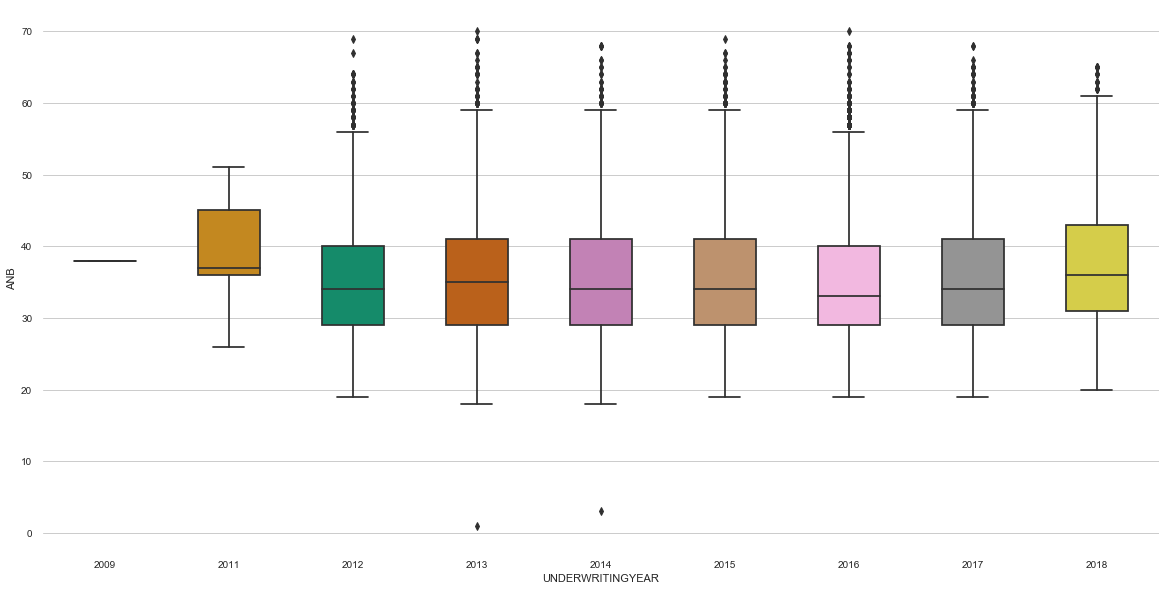

In [31]:
plt.figure(figsize=(20,10))
bplot = sns.boxplot(y='ANB', x='UNDERWRITINGYEAR', 
                 data=data, 
                 width=0.5,
                 palette="colorblind")

**Sum assured statistical analysis**

In [32]:
data.groupby('UNDERWRITINGYEAR')['SUMASSURED'].describe()

count           mean            std      min        25%  \
UNDERWRITINGYEAR                                                              
2009                  1.0   49278.000000            NaN  49278.0   49278.00   
2011                  5.0  158893.400000  123085.935634  58275.0   80321.00   
2012               5829.0  162375.956265  158203.091977      0.0   86261.00   
2013               9664.0  178411.205746  343350.907547      0.0   93222.25   
2014              11232.0  187380.495954  244148.465658      0.0   96960.00   
2015               9584.0  188598.458902  644036.265698      0.0   95984.00   
2016              15072.0  188294.617341  300151.306135   7330.0  102925.75   
2017               9291.0  222402.440460  555118.896157      0.0  101295.00   
2018               4321.0  239883.872407  349428.295403      0.0  101224.00   

                       50%       75%         max  
UNDERWRITINGYEAR                                  
2009               49278.0   49278.0     49278.0  
2011              138779.0  148917.0    368175.0  
2012              120240.0  194250.0   5000000.0  
2013              135379.0  206439.0  29900000.0  
2014              141004.0  211366.0  10599875.0  
2015              141777.0  216448.0  61000000.0  
2016              146912.5  217726.5  30000000.0  
2017              146208.0  225124.0  42053810.0  
2018              145666.0  239578.0   9964478.0

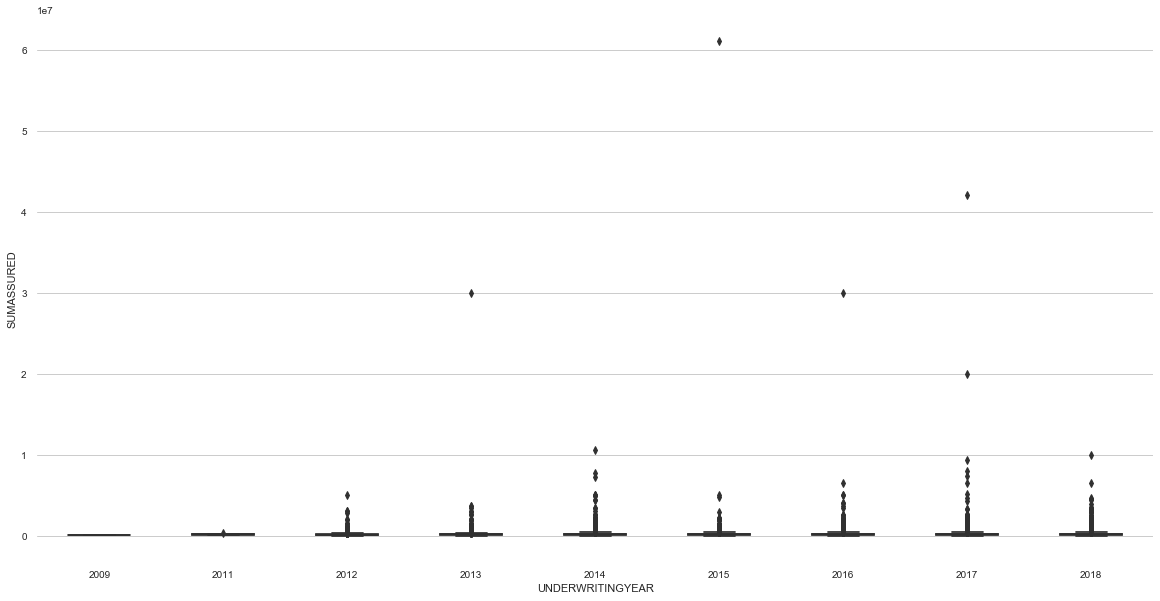

In [33]:
plt.figure(figsize=(20,10))
bplot = sns.boxplot(y='SUMASSURED', x='UNDERWRITINGYEAR', 
                 data=data, 
                 width=0.5,
                 palette="colorblind")

In [34]:
data.isna()

PRODUCT  OCCUPATION  GENDER  EFFECTIVEDATE  UNDERWRITINGYEAR  \
POLICYNO                                                                       
8868646           False       False   False          False             False   
MMP/11887/2018    False       False   False          False             False   
LK3284934         False       False   False          False             False   
MUP/00316/2017    False       False   False          False             False   
HP/23948/2017     False       False   False          False             False   
...                 ...         ...     ...            ...               ...   
BYK/10614/2018    False       False   False          False             False   
MMP/10681/2018    False       False   False          False             False   
MMP/10680/2018    False       False   False          False             False   
BYK/10613/2018    False       False   False          False             False   
MMP/10683/2018    False       False   False          False             False   

                 TERM    ANB  FREQOFPAYMENT  PAYMETHOD  SUMASSURED  \
POLICYNO                                                             
8868646         False  False          False      False       False   
MMP/11887/2018  False  False          False      False       False   
LK3284934       False  False          False      False       False   
MUP/00316/2017  False  False          False      False       False   
HP/23948/2017   False  False          False      False       False   
...               ...    ...            ...        ...         ...   
BYK/10614/2018  False  False          False      False       False   
MMP/10681/2018  False  False          False      False       False   
MMP/10680/2018  False  False          False      False       False   
BYK/10613/2018  False  False          False      False       False   
MMP/10683/2018  False  False          False      False       False   

                PAIDTODATE  PREMIUM  OSPREM  PRODTYPE  INCEPTIONDATE  STATUS  
POLICYNO                                                                      
8868646              False    False   False     False          False   False  
MMP/11887/2018       False    False   False     False          False   False  
LK3284934            False    False   False     False          False   False  
MUP/00316/2017       False    False   False     False          False   False  
HP/23948/2017        False    False   False     False          False   False  
...                    ...      ...     ...       ...            ...     ...  
BYK/10614/2018       False    False   False     False          False   False  
MMP/10681/2018       False    False   False     False          False   False  
MMP/10680/2018       False    False   False     False          False   False  
BYK/10613/2018       False    False   False     False          False   False  
MMP/10683/2018       False    False   False     False          False   False  

[64999 rows x 16 columns]

**Check for null values in the data columns**

In [16]:
for col in data.columns:
    count = 0
    (count+1 for x in data[col] if x == np.nan)
    print(col+' '+str(count))

PRODUCT 0
OCCUPATION 0
GENDER 0
EFFECTIVEDATE 0
UNDERWRITINGYEAR 0
TERM 0
ANB 0
FREQOFPAYMENT 0
PAYMETHOD 0
SUMASSURED 0
PAIDTODATE 0
PREMIUM 0
OSPREM 0
PRODTYPE 0
INCEPTIONDATE 0
STATUS 0


In [35]:
data.shape

(64999, 16)

In [36]:
data.head()

PRODUCT               OCCUPATION GENDER  \
POLICYNO                                                                 
8868646                   BIMA YA KARO        TEACHER [CLASS 1]      M   
MMP/11887/2018  MADISON MONEY MAX PLUS  ADMINISTRATOR [CLASS 1]      F   
LK3284934            MADISON 2000 PLUS     IT MANAGER [CLASS 1]      M   
MUP/00316/2017         MADISON UNIPLAN        TEACHER [CLASS 1]      F   
HP/23948/2017            HEKIMA POLICY        TEACHER [CLASS 1]      F   

               EFFECTIVEDATE  UNDERWRITINGYEAR  TERM  ANB FREQOFPAYMENT  \
POLICYNO                                                                  
8868646           2015-01-09              2015    15   43             M   
MMP/11887/2018    2018-01-07              2018     8   54             M   
LK3284934         2013-01-02              2013    12   43             M   
MUP/00316/2017    2017-01-08              2017     6   58             M   
HP/23948/2017     2017-01-04              2017    12   44             M   

               PAYMETHOD  SUMASSURED PAIDTODATE  PREMIUM  OSPREM PRODTYPE  \
POLICYNO                                                                    
8868646                K    214592.0 2020-04-30   3000.0  -831.0       ED   
MMP/11887/2018        DD    100265.0 2020-06-30   3000.0 -8000.0       IN   
LK3284934              K    305922.0 2020-04-30   5187.0  -548.0       EN   
MUP/00316/2017         K    385638.0 2020-05-31   5000.0 -5000.0       IN   
HP/23948/2017          K    147015.0 2020-05-31   2000.0 -2821.0       EN   

               INCEPTIONDATE  STATUS  
POLICYNO                              
8868646           2015-01-09  ACTIVE  
MMP/11887/2018    2018-04-05  ACTIVE  
LK3284934         2012-11-23  ACTIVE  
MUP/00316/2017    2017-01-08  ACTIVE  
HP/23948/2017     2017-01-13  ACTIVE

In [37]:
# creating bool series True for NaN values  
bool_series = pd.isnull(data['ANB'])  
    
# filtering data  
# displaying data only with Gender = NaN  
data[bool_series]  

Empty DataFrame
Columns: [PRODUCT, OCCUPATION, GENDER, EFFECTIVEDATE, UNDERWRITINGYEAR, TERM, ANB, FREQOFPAYMENT, PAYMETHOD, SUMASSURED, PAIDTODATE, PREMIUM, OSPREM, PRODTYPE, INCEPTIONDATE, STATUS]
Index: []

In [38]:
bool_series.shape

(64999,)

In [39]:
#data.dropna(axis = 0, inplace = True)

In [40]:
data.shape

(64999, 16)

**Model with Categorical and Numerical Features**

In [41]:
y = data['STATUS']
y.head()

POLICYNO
8868646           ACTIVE
MMP/11887/2018    ACTIVE
LK3284934         ACTIVE
MUP/00316/2017    ACTIVE
HP/23948/2017     ACTIVE
Name: STATUS, dtype: object

In [42]:
X = data.loc[:, :'INCEPTIONDATE']
X

PRODUCT               OCCUPATION GENDER  \
POLICYNO                                                                 
8868646                   BIMA YA KARO        TEACHER [CLASS 1]      M   
MMP/11887/2018  MADISON MONEY MAX PLUS  ADMINISTRATOR [CLASS 1]      F   
LK3284934            MADISON 2000 PLUS     IT MANAGER [CLASS 1]      M   
MUP/00316/2017         MADISON UNIPLAN        TEACHER [CLASS 1]      F   
HP/23948/2017            HEKIMA POLICY        TEACHER [CLASS 1]      F   
...                                ...                      ...    ...   
BYK/10614/2018            BIMA YA KARO        TEACHER [CLASS 1]      M   
MMP/10681/2018  MADISON MONEY MAX PLUS        TEACHER [CLASS 1]      M   
MMP/10680/2018  MADISON MONEY MAX PLUS          NURSE [CLASS 1]      F   
BYK/10613/2018            BIMA YA KARO          NURSE [CLASS 1]      F   
MMP/10683/2018  MADISON MONEY MAX PLUS        SOLDIER [CLASS 3]      M   

               EFFECTIVEDATE  UNDERWRITINGYEAR  TERM  ANB FREQOFPAYMENT  \
POLICYNO                                                                  
8868646           2015-01-09              2015    15   43             M   
MMP/11887/2018    2018-01-07              2018     8   54             M   
LK3284934         2013-01-02              2013    12   43             M   
MUP/00316/2017    2017-01-08              2017     6   58             M   
HP/23948/2017     2017-01-04              2017    12   44             M   
...                      ...               ...   ...  ...           ...   
BYK/10614/2018    2018-01-03              2018    10   30             M   
MMP/10681/2018    2018-01-03              2018     8   27             M   
MMP/10680/2018    2018-01-02              2018     8   30             M   
BYK/10613/2018    2018-01-02              2018    12   39             M   
MMP/10683/2018    2018-01-04              2018     8   25             M   

               PAYMETHOD  SUMASSURED PAIDTODATE  PREMIUM   OSPREM PRODTYPE  \
POLICYNO                                                                     
8868646                K    214592.0 2020-04-30   3000.0   -831.0       ED   
MMP/11887/2018        DD    100265.0 2020-06-30   3000.0  -8000.0       IN   
LK3284934              K    305922.0 2020-04-30   5187.0   -548.0       EN   
MUP/00316/2017         K    385638.0 2020-05-31   5000.0  -5000.0       IN   
HP/23948/2017          K    147015.0 2020-05-31   2000.0  -2821.0       EN   
...                  ...         ...        ...      ...      ...      ...   
BYK/10614/2018         K    157729.0 2020-06-30   3500.0  -7000.0       ED   
MMP/10681/2018        DD    101161.0 2018-04-30   3000.0  72000.0       IN   
MMP/10680/2018         K    169948.0 2018-10-31   5000.0  87500.0       IN   
BYK/10613/2018         K    149343.0 2020-03-31   2500.0   2375.0       ED   
MMP/10683/2018         K    101157.0 2020-03-31   3000.0   3000.0       IN   

               INCEPTIONDATE  
POLICYNO                      
8868646           2015-01-09  
MMP/11887/2018    2018-04-05  
LK3284934         2012-11-23  
MUP/00316/2017    2017-01-08  
HP/23948/2017     2017-01-13  
...                      ...  
BYK/10614/2018    2018-01-03  
MMP/10681/2018    2018-01-03  
MMP/10680/2018    2018-01-02  
BYK/10613/2018    2018-01-02  
MMP/10683/2018    2018-01-04  

[64999 rows x 15 columns]

In [43]:
numerical_features = X.select_dtypes(include='number').columns.to_list()
numerical_features

['UNDERWRITINGYEAR', 'TERM', 'ANB', 'SUMASSURED', 'PREMIUM', 'OSPREM']

In [44]:
categorical_features = X.select_dtypes(include='object').columns.to_list()
categorical_features

['PRODUCT', 'OCCUPATION', 'GENDER', 'FREQOFPAYMENT', 'PAYMETHOD', 'PRODTYPE']

In [45]:
date_features = X.select_dtypes(include='datetime64[ns]').columns.to_list()
date_features

['EFFECTIVEDATE', 'PAIDTODATE', 'INCEPTIONDATE']

In [46]:
profile = ProfileReport(data)
profile